In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_df = pd.read_csv("data/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [4]:
#Null 처리
train_df['Embarked'].fillna(train_df['Embarked'].value_counts().index[0],inplace=True)
train_df['Cabin'].fillna('N',inplace=True)
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## 주요 컬럼 EDA

In [5]:
# Object Column
object_list = train_df.dtypes[train_df.dtypes == 'object'].index.tolist()

In [6]:
for col in object_list :
    print(col," 값 분포 \n", train_df[col].value_counts())
    print()

Name  값 분포 
 Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

Sex  값 분포 
 male      577
female    314
Name: Sex, dtype: int64

Ticket  값 분포 
 347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Cabin  값 분포 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C

In [7]:
train_df['Cabin'] = train_df['Cabin'].str[0:1]
train_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [8]:
train_df.groupby(['Sex','Survived'])["Sex"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

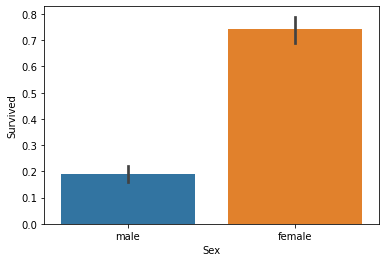

In [9]:
sns.barplot(x='Sex',y = 'Survived', data=train_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

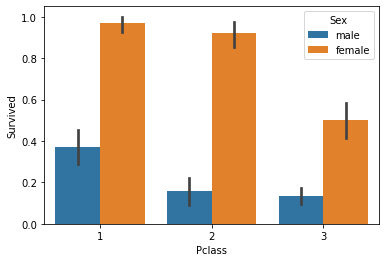

In [10]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train_df)

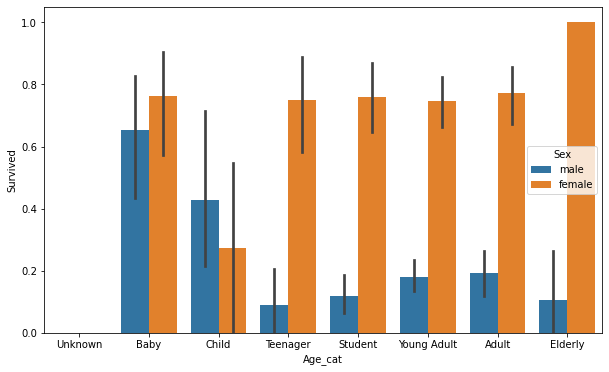

In [11]:
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    return cat

plt.figure(figsize = (10,6))
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

train_df['Age_cat'] = train_df['Age'].apply(lambda x : get_category(x)) 
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=train_df, order = group_names)
train_df.drop('Age_cat',axis=1, inplace=True)

## 타이타닉 예측

In [12]:
from sklearn.preprocessing import LabelEncoder

def encode_features(df):
    features = ['Cabin', 'Sex', 'Embarked']
    le = LabelEncoder()
    for feature in features:
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def fillna(df):
    df['Embarked'].fillna(df['Embarked'].value_counts().index[0],inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    return df
    
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1, inplace = True)
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = encode_features(df)
    return df

In [13]:
train_df = pd.read_csv("./data/train.csv")
y_titanic_train = train_df['Survived']
X_titanic_train = train_df.drop('Survived', axis=1)
X_titanic_train = transform_features(X_titanic_train)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_train, y_titanic_train, test_size=0.2)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression(solver='liblinear')

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("DT 정확도 : ",accuracy_score(y_test,dt_pred))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("RF 정확도 : ",accuracy_score(y_test,rf_pred))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("LR 정확도 : ",accuracy_score(y_test,lr_pred))

DT 정확도 :  0.7653631284916201
RF 정확도 :  0.8044692737430168
LR 정확도 :  0.8100558659217877


In [21]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_cnt, (train_index, test_index) in enumerate(kfold.split(X_titanic_train)):
        X_train, X_test = X_titanic_train.values[train_index], X_titanic_train.values[test_index]
        y_train, y_test = y_titanic_train.values[train_index], y_titanic_train.values[test_index]
        clf.fit(X_train,y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test,pred)
        scores.append(accuracy)
        print(iter_cnt, "교차검증 정확도 : ",accuracy)
    
    mean_score = np.mean(scores)
    print("평균 정확도 : ", mean_score)

exec_kfold(dt_clf, folds=5)

0 교차검증 정확도 :  0.7430167597765364
1 교차검증 정확도 :  0.7696629213483146
2 교차검증 정확도 :  0.8202247191011236
3 교차검증 정확도 :  0.7752808988764045
4 교차검증 정확도 :  0.8146067415730337
평균 정확도 :  0.7845584081350825


In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_train, y_titanic_train, cv=5)
for iter_count, accuracy in enumerate(scores):
    print(iter_count , "교차검증 정확도: ", accuracy)
print("평균 정확도 : ", np.mean(scores))

0 교차검증 정확도:  0.7374301675977654
1 교차검증 정확도:  0.7528089887640449
2 교차검증 정확도:  0.8202247191011236
3 교차검증 정확도:  0.7584269662921348
4 교차검증 정확도:  0.8089887640449438
평균 정확도 :  0.7755759211600024


In [38]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : ', grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print("테스트 세트에서의 DecsionTreeClassifier 정확도 : ",accuracy)

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :  0.8104698118782625
테스트 세트에서의 DecsionTreeClassifier 정확도 :  0.7988826815642458
